### NCAA Basketball Analysis

Hypothesis: Any arbitrary team’s win count can be calculated by analysis of that team’s yearly statistics, including strength of schedule, field goal percentage, etc. 

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv("/Users/adriancavallaris/Documents/BasketballTeamData.csv")

In [3]:
X.head()

,School,G,W,SRS,SOS,PTS,OPP,FG,FGA,FGP,...,3PA,3PP,FT,FTA,FTP,TRB,AST,STL,BLK,PF
0,Air Force,28,5,-5.62,5.04,1880,2089,690,1684,0.410,...,414,0.314,370,589,0.628,1040,385,154,79,555
1,Akron,26,3,-11.17,2.51,1631,1949,575,1409,0.408,...,361,0.316,367,528,0.695,782,307,147,60,454
2,Alabama-Birmingham,30,16,3.68,3.71,2070,2051,737,1803,0.409,...,579,0.323,409,617,0.663,1163,366,209,100,620
3,Alabama State,27,9,-23.62,-12.82,1995,2226,713,1677,0.425,...,487,0.366,391,607,0.644,834,289,225,51,482
4,Alabama,32,19,7.01,6.13,2303,2275,843,1974,0.427,...,700,0.364,362,546,0.663,1252,408,197,196,567


In [4]:
X.describe()

,G,W,SRS,SOS,PTS,OPP,FG,FGA,FGP,3P,3PA,3PP,FT,FTA,FTP,TRB,AST,STL,BLK,PF
count,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,5937.000000
mean,30.917441,15.980847,-0.707589,-0.306657,2161.780325,2133.042658,760.366367,1735.439495,0.437482,195.028149,563.658880,0.345278,446.147707,648.139292,0.687688,1102.247388,416.141178,214.437754,104.161492,581.174330
std,2.702810,6.375489,10.296557,5.671385,297.460618,202.695240,106.492103,194.308289,0.027116,50.500707,116.303607,0.096846,81.819174,109.336651,0.038735,145.342991,75.471516,46.575798,39.334102,65.719479
min,17.000000,0.000000,-35.850000,-15.810000,1074.000000,1233.000000,367.000000,843.000000,0.344000,56.000000,188.000000,0.204000,193.000000,298.000000,0.541000,441.000000,186.000000,92.000000,20.000000,189.000000
25%,29.000000,11.000000,-8.060000,-4.740000,1946.750000,1994.000000,683.000000,1597.000000,0.420000,163.000000,484.000000,0.325000,387.000000,572.000000,0.662000,1001.000000,363.000000,182.000000,76.000000,536.000000
50%,31.000000,15.000000,-1.370000,-0.950000,2131.000000,2126.000000,749.000000,1719.000000,0.438000,191.000000,555.000000,0.344000,440.000000,641.000000,0.689000,1090.000000,408.000000,209.000000,99.000000,578.000000
75%,33.000000,20.000000,6.700000,4.510000,2348.250000,2262.000000,826.000000,1855.000000,0.455000,223.000000,635.000000,0.364000,499.000000,718.000000,0.714000,1191.250000,462.000000,242.000000,125.250000,623.000000
max,41.000000,38.000000,34.800000,12.710000,3581.000000,3240.000000,1259.000000,2696.000000,1.000000,1765.000000,1383.000000,7.986000,800.000000,1146.000000,1.056000,1824.000000,1052.000000,490.000000,526.000000,859.000000


There are no missing data values, except for about 1/6 of the values in PF.

In [5]:
averagePF = X["PF"].mean()
X["PF"] = X["PF"].fillna(averagePF)

First, let's get a basic prediction model

In [6]:
X.drop(["School"], axis=1, inplace=True)
y = X.pop("W")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test)

R^2: 0.90662940075


That's a pretty good base score. But the model could use tuning.

In [9]:
%%timeit
model = RandomForestRegressor(500, n_jobs = 1)
model.fit(X_train, y_train)

1 loop, best of 3: 22.4 s per loop


In [10]:
%%timeit
model = RandomForestRegressor(500, n_jobs = -1)
model.fit(X_train, y_train)

1 loop, best of 3: 9.08 s per loop


Thus, n_jobs needs to be equal to -1.

25 trees
R^2: 0.913858750676

50 trees
R^2: 0.917835755532

100 trees
R^2: 0.918778245333

200 trees
R^2: 0.919204284622

500 trees
R^2: 0.919305073455

750 trees
R^2: 0.91932998791

1000 trees
R^2: 0.919590546309



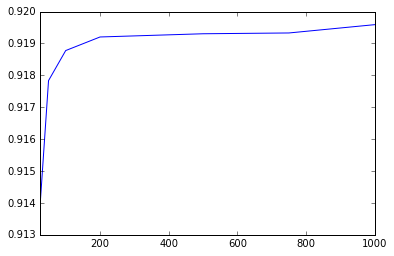

In [11]:
results = []
n_estimator_options = [25, 50, 100, 200, 500, 750, 1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, n_jobs = -1)
    model.fit(X_train, y_train)
    print trees, "trees"
    r2 = model.score(X_test, y_test)
    print "R^2:", r2
    results.append(r2)
    print ""
pd.Series(results, n_estimator_options).plot();

The highest score occured with 1000 trees. 

auto option
R^2: 0.919500090297

None option
R^2: 0.919240899841

sqrt option
R^2: 0.900026142444

log2 option
R^2: 0.900627721617

0.5 option
R^2: 0.918403048012

0.6 option
R^2: 0.920144352245

0.7 option
R^2: 0.921187760537

0.8 option
R^2: 0.92173901678

0.9 option
R^2: 0.92070976468

2 option
R^2: 0.872521450435



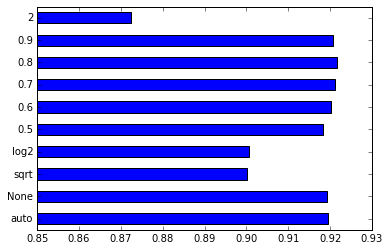

In [12]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.5, 0.6, 0.7, 0.8, .9, 2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = max_features)
    model.fit(X_train, y_train)
    print max_features, "option"
    r2 = model.score(X_test, y_test)
    print "R^2:", r2
    results.append(r2)
    print ""
pd.Series(results, max_features_options).plot(kind = "barh", xlim = (.85,.93));

The best result was yielded with 0.8.

1 min samples
R^2: 0.921846790734

2 min samples
R^2: 0.921459688578

3 min samples
R^2: 0.921532015817

4 min samples
R^2: 0.921063151248

5 min samples
R^2: 0.920626585018

6 min samples
R^2: 0.920122538015

7 min samples
R^2: 0.919652351914

8 min samples
R^2: 0.919267584832

9 min samples
R^2: 0.918807032685

10 min samples
R^2: 0.917931768371



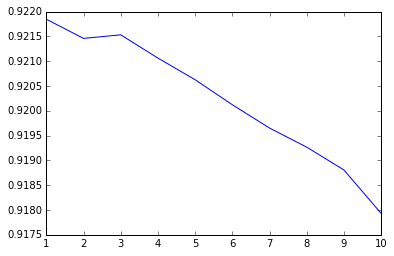

In [13]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = 0.8, 
                                  min_samples_leaf = min_samples)
    model.fit(X_train, y_train)
    print min_samples, "min samples"
    r2 = model.score(X_test, y_test)
    print "R^2:", r2
    results.append(r2)
    print ""
pd.Series(results, min_samples_leaf_options).plot();

1 min samples yielded the best result. 

So, the model has improved quite a bit with some tuning. However, we can use K-fold cross validation to ensure that the model is not overfitted. 

In [14]:
model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = 0.8, 
                                  min_samples_leaf = 1)
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model, X, y, cv = 10)

In [15]:
scores

array([ 0.9086156 ,  0.91931887,  0.90532219,  0.91009057,  0.90999092,
        0.90543703,  0.92138623,  0.91779839,  0.9094402 ,  0.90636643])

In [16]:
mean = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
confInterval =  2.262 * std_error
lowerBound = mean - confInterval
upperBound = mean + confInterval

print "Score is %f +/-  %f" % (mean, confInterval)
print 'Thus, there is a 95 percent probability that if this experiment were repeated, the average score would be between %f and %f' % (lowerBound, upperBound)

Score is 0.911377 +/-  0.004024
Thus, there is a 95 percent probability that if this experiment were repeated, the average score would be between 0.907352 and 0.915401


In [20]:
model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = 0.8, 
                                  min_samples_leaf = 1)
model.fit(X_train, y_train)

In [24]:
predicted_probs = model.predict(X)

In [30]:
numpy.savetxt("results.csv", predicted_probs, fmt='%.2f', delimiter = ",")

### Findings
This project has proven the hypothesis. It is possible to predict the wins of a team within a certain degree of confidence, using statistics of the team's performance. 